<a href="https://colab.research.google.com/github/Sindhuhar/math-for-machine-learning/blob/main/02_linear_algebra_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Eigendecomposition**

Affine Transformation via Matrix Application

Let's say we have a vector v:

In [160]:
import numpy as np
v=np.array([3,1])
v

array([3, 1])

Let's plot v using my plot_vectors() function

In [161]:
import matplotlib.pyplot as plt

In [162]:
def plot_vectors(vectors,colors):
    
    plt.figure()
    plt.axvline(x=0,color='lightgray')
    plt.axhline(y=0,color='lightgray')

    for i in range (len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],  #Quiver plot is basically a type of 2D plot which shows vector lines as arrows.
                   angles='xy',scale_units='xy',scale=1,color=colors[i])


(-1.0, 5.0)

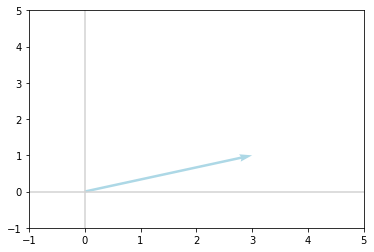

In [163]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [164]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [165]:
Iv = np.dot(I,v)
Iv

array([3, 1])

In [166]:
v == Iv

array([ True,  True])

(-1.0, 5.0)

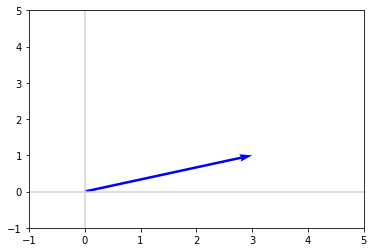

In [167]:
plot_vectors([Iv],['blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

In contrast, consider this matrix (let's call it E) that flips vectors over the x-axis:

In [168]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [169]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

(-3.0, 3.0)

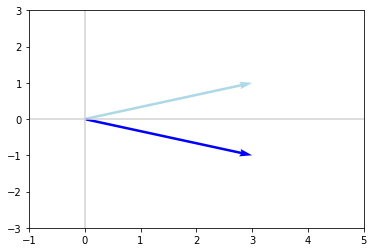

In [170]:
plot_vectors([v,Ev],['lightblue','blue'])
plt.xlim(-1,5)
plt.ylim(-3,3)

Or, this matrix,F, which flips vectors over the y-axis:

In [171]:
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [172]:
Fv = np.dot(F,v)
Fv

array([-3,  1])

(-1.0, 5.0)

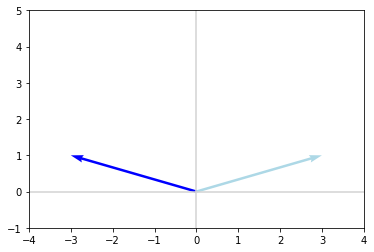

In [173]:
plot_vectors([v,Fv],['lightblue','blue'])
plt.xlim(-4,4)
plt.ylim(-1,5)

Applying a flipping matrix is an example of an affine transformation: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine transformations include:



*   Scaling (changing the length of vectors)
*   Shearing

*   Rotation





A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix A to the vector v:

In [174]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [175]:
Av = np.dot(A,v)
Av

array([1, 4])

(-1.0, 5.0)

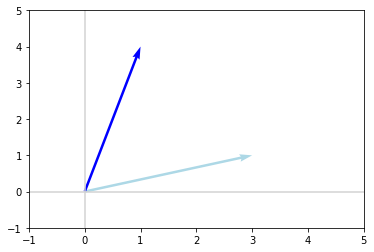

In [176]:
plot_vectors([v,Av],['lightblue','blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

(-1.0, 5.0)

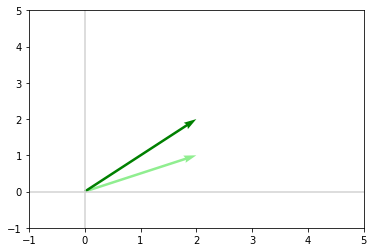

In [177]:
#Another example of applying A:
v2 = np.array([2,1])
plot_vectors([v2,np.dot(A,v2)],['lightgreen','green'])
plt.xlim(-1,5)
plt.ylim(-1,5)

We can concatenate several vectors together into a matrix (say,  V), where each column is a separate vector. Then, whatever linear transformations we apply to V will be independently applied to each column (vector):

In [178]:
v

array([3, 1])

In [179]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T

matrix([[3],
        [1]])

In [180]:
v3 = np.array([-3,-1])
v4 = np.array([-1,1])

In [181]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis = 1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [182]:
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [183]:
AV = np.dot(A,V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [184]:
# function to convert column of matrix to 1D vector:
def vectorfy (mtrx,clmn):
  return np.array(mtrx[:,clmn]).reshape(-1)


In [185]:
vectorfy (V,0)

array([3, 1])

In [186]:
vectorfy(V,1)

array([2, 1])

In [187]:
vectorfy(V,2)

array([-3, -1])

In [188]:
vectorfy(V,3)

array([-1,  1])

In [189]:
vectorfy(AV,0)

array([1, 4])

In [190]:
vectorfy(AV,1)

array([2, 2])

In [191]:
vectorfy(AV,2)

array([-1, -4])

In [192]:
vectorfy(AV,3)

array([ 5, -4])

(-5.0, 5.0)

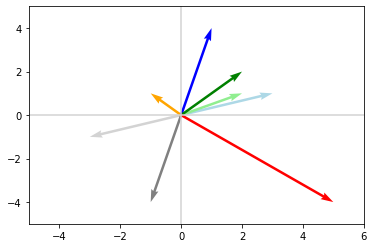

In [193]:
plot_vectors ([vectorfy(V,0),vectorfy(V,1),vectorfy(V,2),vectorfy(V,3),
            vectorfy(AV,0),vectorfy(AV,1),vectorfy(AV,2),vectorfy(AV,3)],
             ['lightblue','lightgreen','lightgray','orange','blue','green','gray','red'])
plt.xlim(-5,6)
plt.ylim(-5,5)

**Eigenvectors and Eigenvalues**

In [194]:
A

array([[-1,  4],
       [ 2, -2]])

In [195]:
lambdas, V = np.linalg.eig(A)

The matrix contains as many eigenvectors as there are columns of A:

In [196]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [197]:
lambdas

array([ 1.37228132, -4.37228132])

In [198]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [199]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [200]:
Av= np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [201]:
lambduh*v

array([1.18031462, 0.70000958])

(-1.0, 2.0)

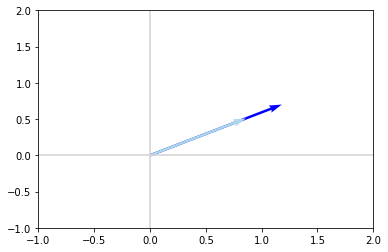

In [202]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [203]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [204]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [205]:
Av2 = np.dot(A,v2)
Av2

array([ 3.34281692, -2.81822977])

In [206]:
lambda2 *v2

array([ 3.34281692, -2.81822977])

(-3.0, 2.0)

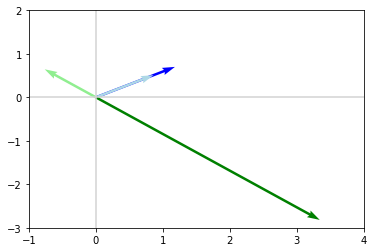

In [207]:
plot_vectors([Av,v,Av2,v2],['blue','lightblue','green','lightgreen'])
plt.xlim(-1,4)
plt.ylim(-3,2)

**Eigenvectors in >2 Dimensions**

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows):

In [208]:
x = np.array([[25,2,9],[5,26,-5],[3,7,-1]])
x

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [209]:
lambdas_x,V_x = np.linalg.eig(x)
V_x

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [210]:
lambdas_x

array([29.67623202, 20.62117365, -0.29740567])

In [211]:
v_x = V_x[:,0]
v_x

array([-0.71175736, -0.66652125, -0.22170001])

In [212]:
lambdas_x = lambdas_x[0]
lambdas_x

29.676232023948902

In [213]:
np.dot(x,v_x)

array([-21.12227645, -19.77983919,  -6.5792208 ])

**2x2 Matrix Determinants**

In [214]:
X = np.array([[4,2],[-5,-3]])
X

array([[ 4,  2],
       [-5, -3]])

In [215]:
np.linalg.det(X)

-2.0000000000000013

In [216]:
N = np.array([[-4,1],[-8,2]])
N

array([[-4,  1],
       [-8,  2]])

In [217]:
np.linalg.det(N)

0.0

In [218]:
import torch
N = torch.tensor([[-4,1],[-8,2.]]) # must use float not int
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [219]:
torch.det(N)

tensor(-0.)

**Generalizing Determinants**

In [220]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [221]:
np.linalg.det(X)

19.999999999999996

**Determinants & Eigenvalues**

In [222]:
lambdas,V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [223]:
np.product(lambdas)

19.99999999999999

Here's |det(X)| in NumPy:

In [224]:
np.abs(np.linalg.det(X))

19.999999999999996

Let's use a matrix B, which is composed of basis vectors, to explore the impact of applying matrices with varying |det(X)| 
 values:

In [225]:
B = np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

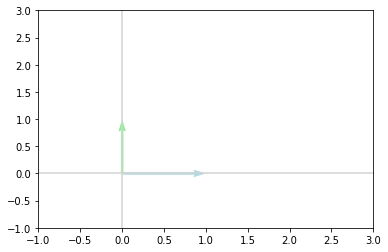

In [226]:
plot_vectors([vectorfy(B,0),vectorfy(B,1)],['lightblue','lightgreen'])
plt.xlim(-1,3)
plt.ylim(-1,3)

Let's start by applying the matrix N
 to B
, recalling from earlier that N
 is singular:

In [227]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [228]:
np.linalg.det(N)

0.0

In [229]:
NB = np.dot(N,B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

(-9.0, 3.0)

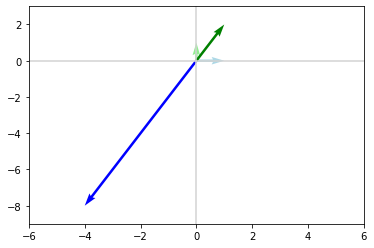

In [230]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(NB,0),vectorfy(NB,1)],
             ['lightblue','lightgreen','blue','green'])
plt.xlim(-6,6)
plt.ylim(-9,3)

In [231]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

In [232]:
I

array([[1, 0],
       [0, 1]])

In [233]:
np.linalg.det(I)

1.0

In [234]:
IB = np.dot(I,B)
IB

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

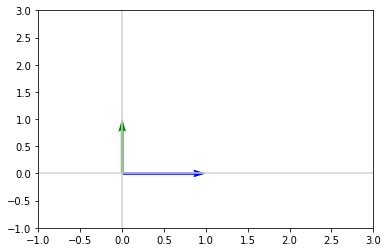

In [235]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(IB,0),vectorfy(IB,1)],
             ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [236]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix J
 which is more interesting:

In [237]:
J = np.array([[-0.5,0],[0,2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [238]:
np.linalg.det(J)

-1.0

In [239]:
np.abs(np.linalg.det(J))

1.0

In [240]:
JB = np.dot(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

(-1.0, 3.0)

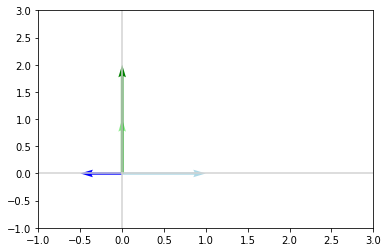

In [241]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(JB,0),vectorfy(JB,1)],
             ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [242]:
lambdas,V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix D
, which scales vectors by doubling along both the x
 and y
 axes:

In [243]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [244]:
np.linalg.det(D)

4.0

In [245]:
DB = np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

(-1.0, 3.0)

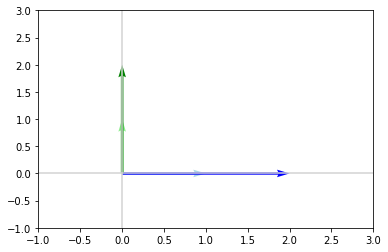

In [246]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(DB,0),vectorfy(DB,1)],
             ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [247]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

**Eigendecomposition**

In [248]:
A = np.array([[4,2],[-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [249]:
lambdas, V = np.linalg.eig(A)
lambdas

array([ 2., -1.])

In [250]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [251]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [252]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [253]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers.

In [254]:
A = np.array([[2,1],[1,2]])
A

array([[2, 1],
       [1, 2]])

In [255]:
lambdas, Q = np.linalg.eig(A)
lambdas

array([3., 1.])

In [256]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [257]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [258]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

In [259]:
np.dot(Q.T,Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [260]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

# **Matrix Operations for ML**

**Singular Value Decomposition (SVD)**

SVD of matirx A is:

A = U*D*V.T (V Transpose)

Where:



*   **U** is an orthogonal (m,m) matrix; its columns are the **left-singular vectors** of **A**.
*   **V** is an orthogonal (n,n) matrix; its columns are the **right-singular vectors** of **A**.
* **D** is a diagonal (m,n) matrix; elements along its diagonal are the **singular values** of **A**.



In [261]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [262]:
U,d,VT = np.linalg.svd(A)

In [263]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [264]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [265]:
d

array([8.66918448, 4.10429538])

In [266]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [267]:
D = np.concatenate((np.diag(d),[[0,0]]),axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [268]:
np.dot(U,np.dot(D,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

**Image Compression via SVD**

In [269]:
from PIL import Image
from PIL import ImageEnhance
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [270]:
uploaded = files.upload()

Saving cartoonnn.jpeg to cartoonnn (2).jpeg


In [271]:
img = cv2.imread("./cartoonnn.jpeg")

In [272]:
! ls && pwd

'cartoonnn (1).jpeg'  'cartoonnn (3).jpg'   oboe-with-book.jpg.1   test.png
'cartoonnn (1).jpg'    cartoonnn.jpeg	    oboe-with-book.jpg.2
'cartoonnn (2).jpeg'   cartoonnn.jpg	    sample_data
'cartoonnn (2).jpg'    oboe-with-book.jpg   test2.png
/content


In [273]:
print(type(img))

<class 'numpy.ndarray'>


In [274]:
print(img.shape)

(301, 289, 3)


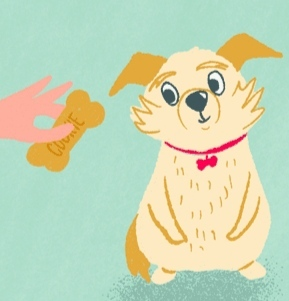

In [275]:
cv2_imshow(img)

In [276]:
data = np.zeros((301, 289, 3), dtype=np.uint8)
img = Image.fromarray(data, 'RGB')
img.save('test.png')
img.show()

In [277]:
print(type(img))

<class 'PIL.Image.Image'>


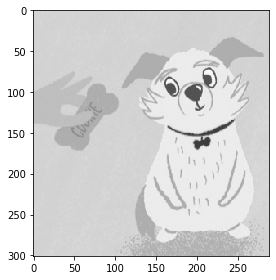

In [304]:
from skimage import color
from skimage import io

img = io.imread('cartoonnn.jpeg')
imgGray = color.rgb2gray(img)
io.imshow(imgGray)

In [296]:
print(type(imgGray))

<class 'numpy.ndarray'>


In [280]:
print(imgGray.shape)

(301, 289)


In [281]:
U, sigma, V = np.linalg.svd(imgGray)

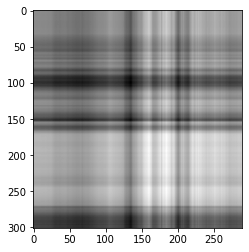

In [282]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

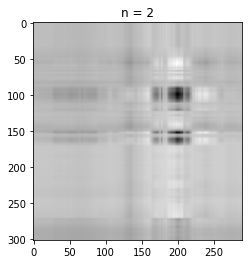

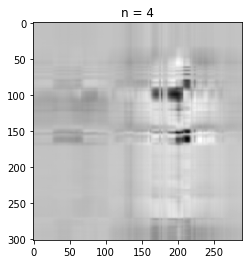

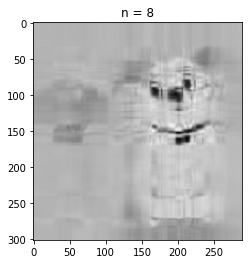

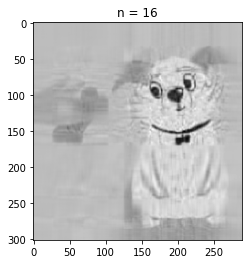

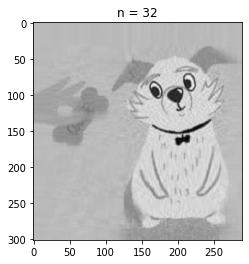

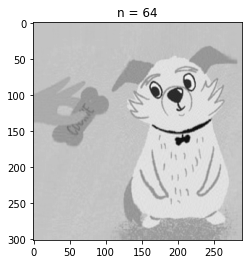

In [283]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [284]:
imgGray.shape

(301, 289)

In [297]:
full_representation = 301*289
full_representation

86989

In [298]:
svd64_rep = 64*301 + 64 + 64*289
svd64_rep

37824

In [299]:
svd64_rep/full_representation

0.4348135971214751

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original!

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

In [285]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

--2023-01-23 14:12:14--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: ‘oboe-with-book.jpg.3’

oboe-with-book.jpg. 100%[===================>] 409.73K  --.-KB/s    in 0.03s   

2023-01-23 14:12:15 (11.6 MB/s) - ‘oboe-with-book.jpg.3’ saved [419564/419564]



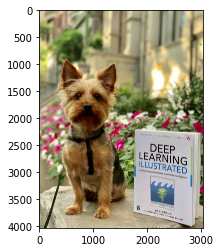

In [286]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

In [287]:
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


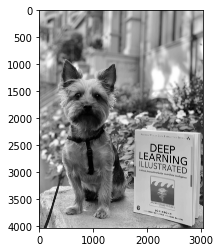

In [288]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

In [289]:
print(type(imggray))

<class 'PIL.Image.Image'>


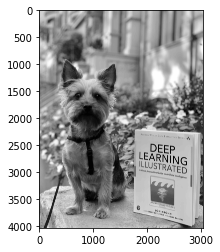

In [290]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [291]:
U, sigma, V = np.linalg.svd(imgmat)

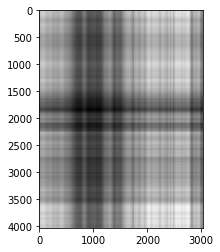

In [292]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

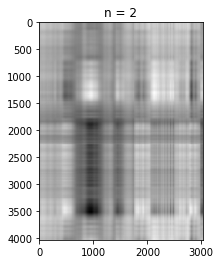

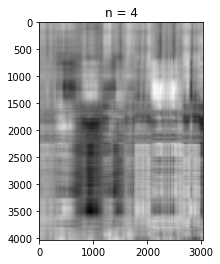

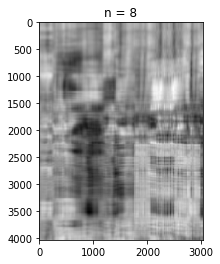

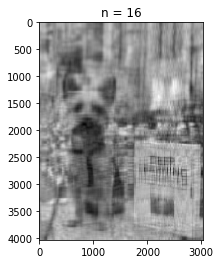

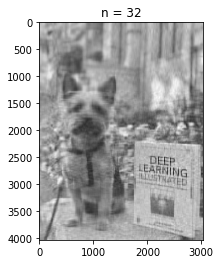

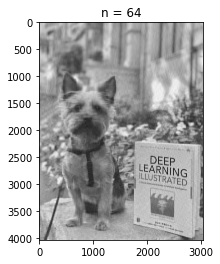

In [293]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [300]:
imgmat.shape

(4032, 3024)

In [301]:
full_rep = 4032*3024
full_rep

12192768

In [302]:
svd64_repn = 64*4032 + 64 + 64*3024
svd64_repn

451648

In [303]:
svd64_repn/full_rep

0.037042286050222556

**The Moore-Penrose Pseudoinverse**

In [305]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [306]:
U,d,VT = np.linalg.svd(A)

In [307]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [309]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [310]:
d

array([8.66918448, 4.10429538])

In [312]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [313]:
1/8.669

0.11535355865728457

In [314]:
1/4.104

0.24366471734892786

...and then we would take the tranpose of the resulting matrix.

Because D is a diagonal matrix, this can, however, be done in a single step by inverting D:

In [316]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [322]:
Dplus = np.concatenate((Dinv,np.array([[0,0]]).T),axis = 1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [323]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [324]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

For regression problems, we typically have many more cases than features to predict. Let's solve a miniature example of such an overdetermined situation.

We have eight data points (n = 8):

In [341]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [343]:
title = 'Clinical Trial'
xlabel = 'Drug dosage(ml)'
ylabel = 'Forgetfulness'

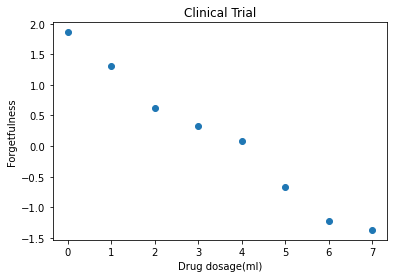

In [345]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1,y) 

Although it appears there is only one predictor (x1
), our model requires a second one (let's call it x0
) in order to allow for a 
y-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The 
y-intercept is constant across all the points so we can set it equal to 1 across the board:

In [346]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [347]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T),axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

In [349]:
w = np.dot(np.linalg.pinv(X),y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the 
y-intercept of the line, which is typically denoted as 
b:

In [351]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

In [353]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

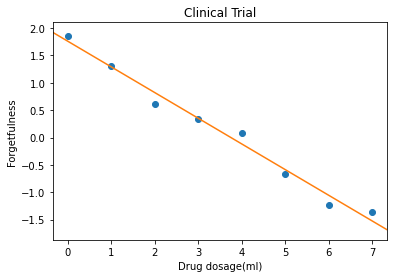

In [355]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1,y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_  = ax.plot([x_min,x_max], [y_at_xmin, y_at_xmax], c='C01')

**Principal Component Analysis**

In [356]:
from sklearn import datasets
iris = datasets.load_iris()

In [357]:
iris.data.shape

(150, 4)

In [358]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [359]:
iris.data[0:6, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [361]:
from sklearn.decomposition import PCA

In [362]:
pca = PCA(n_components=2)

In [363]:
X = pca.fit_transform(iris.data)

In [364]:
X.shape

(150, 2)

In [365]:
X[0:6, :]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

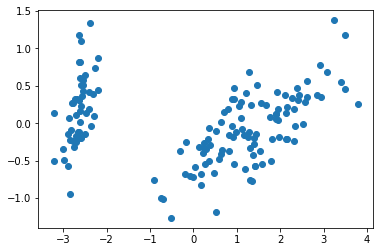

In [366]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [367]:
iris.target.shape

(150,)

In [368]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [369]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [370]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

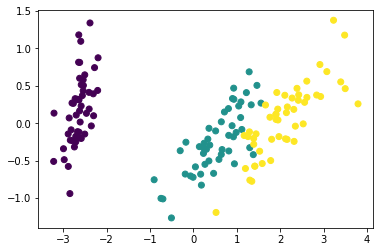

In [371]:
_ = plt.scatter(X[:,0],X[:,1],c=iris.target)